In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def upSample_nnf(nnf, size=None):
    ah, aw, ac = nnf.shape

    if size is None:
        size = [ah * 2, aw * 2, ac]

    bh, bw, bc = size
    ratio_h, ratio_w = bh / ah, bw / aw
    target = np.zeros(shape=(size[0], size[1], size[2])).astype(np.int)

    for by in range(bh):
        for bx in range(bw):
            quot_h, quot_w = int(by // ratio_h), int(bx // ratio_w)
            # print(quot_h, quot_w)
            rem_h, rem_w = (by - quot_h * ratio_h), (bx - quot_w * ratio_w)
            target[by, bx] = nnf[quot_h, quot_w]

    return target

uint8 (448, 448, 3)


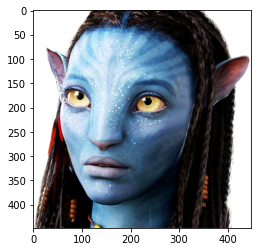

In [23]:
img_path = '../A.png'
img = Image.open(img_path)
img = np.array(img)
print(img.dtype, img.shape)
plt.imshow(img)
plt.show()
# upSample_nnf(nnf)

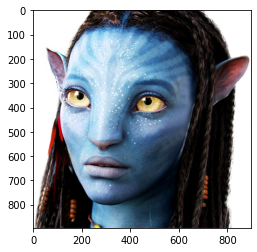

In [24]:
target = upSample_nnf(img)
plt.imshow(target)
plt.show()

In [3]:
import torch as t
from torch import nn

class FullConnect(nn.Module):
    def __init__(self):
        super(FullConnect, self).__init__()
        self.layer = nn.Linear(3,4)

    def forward(self, x):
        return self.layer(x)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 等价与self.register_parameter('param1' ,nn.Parameter(t.randn(3, 3)))
        self.param1 = nn.Parameter(t.rand(3, 3))
        self.submodel1 = nn.Linear(3, 4)
        self.submodel2 = FullConnect()
    def forward(self, input):
        x = self.param1.mm(input)
        x = self.submodel1(x)
        return x
net = Net()
net

Net(
  (submodel1): Linear(in_features=3, out_features=4, bias=True)
  (submodel2): FullConnect(
    (layer): Linear(in_features=3, out_features=4, bias=True)
  )
)

In [2]:
net._modules

OrderedDict([('submodel1', Linear(in_features=3, out_features=4, bias=True)),
             ('submodel2',
              FullConnect(
                (layer): Linear(in_features=3, out_features=4, bias=True)
              ))])

In [3]:
import torchvision.models as models

vgg19_model = models.vgg19(pretrained=False)
print(vgg19_model.features)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3, 3, 3, 1, 0, False), 
    nn.ReLU(inplace=True))
list(model)

In [8]:
import torch as t
from torch import nn

def normalize(feature_map):
    """
    normed_feature_map只有在dim=1方向上才保持原来数值间的比例，为什么要这样归一化呢？    
    """
    response = t.sum(feature_map*feature_map, dim=1, keepdim=True)
    print("response's shape before normalization:\n", response.shape)
    print("response's shape before normalization:\n", response)
    print()
    normed_feature_map = feature_map/t.sqrt(response)
    print("normed_feature_map's shape:\n", normed_feature_map.shape)
    print("normed_feature_map:\n", normed_feature_map)
    print()
    response = (response-t.min(response))/(t.max(response)-t.min(response))
    print("response's shape after normalization:\n", response.shape)
    print("response's shape after normalization:\n", response)
    return  normed_feature_map, response

In [10]:
t.manual_seed(1000)
feat = t.randint(10, (3, 5, 5), dtype=t.float32)
print(feat)

tensor([[[7., 9., 7., 8., 1.],
         [4., 6., 7., 7., 4.],
         [5., 5., 4., 3., 4.],
         [3., 0., 4., 7., 1.],
         [2., 8., 5., 0., 2.]],

        [[0., 2., 7., 4., 8.],
         [6., 8., 6., 8., 5.],
         [6., 0., 7., 5., 8.],
         [4., 8., 3., 1., 8.],
         [5., 8., 5., 4., 4.]],

        [[4., 7., 8., 8., 1.],
         [8., 2., 7., 8., 9.],
         [3., 7., 5., 2., 3.],
         [8., 3., 0., 3., 9.],
         [6., 5., 7., 7., 3.]]])


In [11]:
normed_feature_map, response = normalize(feat)

response's shape before normalization:
 torch.Size([3, 1, 5])
response's shape before normalization:
 tensor([[[103., 206., 155., 171.,  38.]],

        [[113., 196., 168., 122., 233.]],

        [[189., 136., 187., 190., 181.]]])

normed_feature_map's shape:
 torch.Size([3, 5, 5])
normed_feature_map:
 tensor([[[0.6897, 0.6271, 0.5623, 0.6118, 0.1622],
         [0.3941, 0.4180, 0.5623, 0.5353, 0.6489],
         [0.4927, 0.3484, 0.3213, 0.2294, 0.6489],
         [0.2956, 0.0000, 0.3213, 0.5353, 0.1622],
         [0.1971, 0.5574, 0.4016, 0.0000, 0.3244]],

        [[0.0000, 0.1429, 0.5401, 0.3621, 0.5241],
         [0.5644, 0.5714, 0.4629, 0.7243, 0.3276],
         [0.5644, 0.0000, 0.5401, 0.4527, 0.5241],
         [0.3763, 0.5714, 0.2315, 0.0905, 0.5241],
         [0.4704, 0.5714, 0.3858, 0.3621, 0.2620]],

        [[0.2910, 0.6002, 0.5850, 0.5804, 0.0743],
         [0.5819, 0.1715, 0.5119, 0.5804, 0.6690],
         [0.2182, 0.6002, 0.3656, 0.1451, 0.2230],
         [0.5819, 0.2572, 0.0

In [3]:
import torch
from tensorboardX import SummaryWriter

writer = SummaryWriter()

def visualize_deconvolute(loss, iter_num, target, noise):
    from torchvision.utils import make_grid
    writer.add_scalar("data/loss", loss, iter_num)
    img_tensor = torch.cat([target, noise], dim=0)
    img_tensor = make_grid(img_tensor, nrow=2)
    writer.add_image("target/noise/output", img_tensor, iter_num)
    writer.close()

loss = torch.randn([25])
target = torch.randn([25, 3, 5, 5])
noise = torch.randn([25, 3, 5, 5])
for i in range(25):
    print(loss, i)
    visualize_deconvolute(loss[i], i, target[i].unsqueeze(0), noise[i].unsqueeze(0))

tensor([ 1.6831,  0.7342, -0.7285,  0.5902,  1.2858, -0.2575, -0.1900,  0.1335,
         0.0583, -1.7179,  1.1467,  0.1842,  0.4590, -1.6410,  1.3511,  0.9654,
        -1.0697,  0.7245,  1.3565,  1.2186,  1.8323,  0.1605,  0.8149,  1.7497,
         0.6371]) 0
tensor([ 1.6831,  0.7342, -0.7285,  0.5902,  1.2858, -0.2575, -0.1900,  0.1335,
         0.0583, -1.7179,  1.1467,  0.1842,  0.4590, -1.6410,  1.3511,  0.9654,
        -1.0697,  0.7245,  1.3565,  1.2186,  1.8323,  0.1605,  0.8149,  1.7497,
         0.6371]) 1
tensor([ 1.6831,  0.7342, -0.7285,  0.5902,  1.2858, -0.2575, -0.1900,  0.1335,
         0.0583, -1.7179,  1.1467,  0.1842,  0.4590, -1.6410,  1.3511,  0.9654,
        -1.0697,  0.7245,  1.3565,  1.2186,  1.8323,  0.1605,  0.8149,  1.7497,
         0.6371]) 2
tensor([ 1.6831,  0.7342, -0.7285,  0.5902,  1.2858, -0.2575, -0.1900,  0.1335,
         0.0583, -1.7179,  1.1467,  0.1842,  0.4590, -1.6410,  1.3511,  0.9654,
        -1.0697,  0.7245,  1.3565,  1.2186,  1.8323,  0.1605

In [9]:
writer = SummaryWriter()

def visualize_deep_image_analogy(F_A, F_AP, F_B, F_BP, curr_layer):
    from torchvision.utils import make_grid
    img = []
    name = ['F_A', 'F_AP', 'F_B', 'F_BP']
    for i, F in enumerate([F_A, F_AP, F_B, F_BP]):
        img = F[curr_layer].squeeze().unsqueeze(1)
        img = make_grid(img, nrow=10, normalize=True)
        writer.add_image("feature map {} on layer{}".format(
            name[i], curr_layer), img, i)
        print("feature map {} on layer{}".format(
            name[i], curr_layer))
    writer.close()

F_A = torch.rand(6, 1, 20, 5, 5)
F_AP = torch.rand(6, 1, 20, 5, 5)
F_B = torch.rand(6, 1, 20, 5, 5)
F_BP = torch.rand(6, 1, 20, 5, 5)
visualize_deep_image_analogy(F_A, F_AP, F_AP, F_BP, 0)

feature map F_A on layer0
feature map F_AP on layer0
feature map F_B on layer0
feature map F_BP on layer0
